# Let's clean up here
A motivation to these workshops was to show that data analysis (and whole data science, generally speaking) are not so difficult as they are thought to be. What's more, any advanced knowledge in field of programming is not necessary, as we believe, the most important is an ability to think in an analytic way.

## 01. Basics
First of all, let define what the data analysis is all about. There are too many data related names and professions on the market nowadays, so we are going to start with the description of the process to then go through it. I like the definition of *data analysis*, which describes it as **a process of finding patterns and getting insights from raw data**. The way from this data into the knowledge can be divided into several parts:
 * collecting data
 * cleaning and pruning
 * structuring
 * enrichment
 * visualization


# 02. Collecting and cleaning data
Typically, we will initially receive a file containing more or less structured data and a task to be solved. It is rarely prepared for solving our particular issue - most of the times it is just a raw output of some kind of application or the database exported to CSV, JSON or so. 

Sometimes gathering the data is a part of the job, however we will assume we have already got the file with the data extracted from the system that it comes from.

### Example 01. Lyrics from Metrolyrics
As a first example we are going to take a dataset consisting of 380 000 lyrics of songs. It is available as a CSV file. Let have a look at what is inside.

In [5]:
import pandas as pd
import pandas_profiling

# Load the CSV file
lyrics_df = pd.read_csv("./datasets/380000-lyrics-from-metrolyrics/lyrics.csv.zip", 
                        compression="zip")
# Show a table with the first 10 entries
lyrics_df.head(n=10)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>index</th>
      <th>song</th>
      <th>year</th>
      <th>artist</th>
      <th>genre</th>
      <th>lyrics</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>0</td>
      <td>ego-remix</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>Oh baby, how you doing?\nYou know I'm gonna cu...</td>
    </tr>
    <tr>
      <th>1</th>
      <td>1</td>
      <td>then-tell-me</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>playin' everything so easy,\nit's like you see...</td>
    </tr>
    <tr>
      <th>2</th>
      <td>2</td>
      <td>honesty</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>If you search\nFor tenderness\nIt isn't hard t...</td>
    </tr>
    <tr>
      <th>3</th>
      <td>3</td>
      <td>you-are-my-rock</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...</td>
    </tr>
    <tr>
      <th>4</th>
      <td>4</td>
      <td>black-culture</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>Party the people, the people the party it's po...</td>
    </tr>
    <tr>
      <th>5</th>
      <td>5</td>
      <td>all-i-could-do-was-cry</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>I heard\nChurch bells ringing\nI heard\nA choi...</td>
    </tr>
    <tr>
      <th>6</th>
      <td>6</td>
      <td>once-in-a-lifetime</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>This is just another day that I would spend\nW...</td>
    </tr>
    <tr>
      <th>7</th>
      <td>7</td>
      <td>waiting</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>Waiting, waiting, waiting, waiting\nWaiting, w...</td>
    </tr>
    <tr>
      <th>8</th>
      <td>8</td>
      <td>slow-love</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>[Verse 1:]\nI read all of the magazines\nwhile...</td>
    </tr>
    <tr>
      <th>9</th>
      <td>9</td>
      <td>why-don-t-you-love-me</td>
      <td>2009</td>
      <td>beyonce-knowles</td>
      <td>Pop</td>
      <td>N-n-now, honey\nYou better sit down and look a...</td>
    </tr>
  </tbody>
</table>
</div>

As we may see, the file contains 6 columns: index, song title, release year, artist, genre and lyrics. Let try to have a brief overview of what is really inside. We need to have some kind of intuition about the data, in order to be able to work with it more.

First of all, let try to find all the years that the songs come from.

In [5]:
print(lyrics_df["year"].unique())

[2009 2007 2013 2010 2012 2006 2016 2011 2015 2008 2014 1998 2002 1995 2004
 1972 2005 1978 1970 1981 1994 1997 2003 1976 2001 1983 1987 1993 1982 1986
 1992 1984 1977 1989 1979 1996 1988 1974 1975 1973 1971 1999 1990 1991 1985
 2000 1980  702  112 2038 1968   67]


At the first look we may see there might be a data issue, or we have quite old songs in a database (67, 112, 702). What's more, we have at least one example of the song coming from a future: year 2038 also appears on our list. Let have a look at these examples more in details.

In [6]:
# Filter the dataframe to get only the rows which have the "year" property set to 67, 112, 702 or 2038
old_lyrics_df = lyrics_df.loc[lyrics_df["year"].isin([67, 112, 702, 2038])]
old_lyrics_df.head(16)

<div>
<style>
    .dataframe thead tr:only-child th {
        text-align: right;
    }

    .dataframe thead th {
        text-align: left;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }
</style>
<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>index</th>
      <th>song</th>
      <th>year</th>
      <th>artist</th>
      <th>genre</th>
      <th>lyrics</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>27657</th>
      <td>27657</td>
      <td>star</td>
      <td>702</td>
      <td>clipse</td>
      <td>Hip-Hop</td>
      <td>You're my star\nIt's such a wonder how you shi...</td>
    </tr>
    <tr>
      <th>69708</th>
      <td>69708</td>
      <td>anywhere-remix</td>
      <td>112</td>
      <td>dru-hill</td>
      <td>Hip-Hop</td>
      <td>Here we are all alone\nYou and me, privacy\nAn...</td>
    </tr>
    <tr>
      <th>112159</th>
      <td>112159</td>
      <td>atchim</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112160</th>
      <td>112160</td>
      <td>o-areias</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112161</th>
      <td>112161</td>
      <td>era-uma-vez-um-cavalo</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112162</th>
      <td>112162</td>
      <td>anita</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112163</th>
      <td>112163</td>
      <td>todos-os-patinhos</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112164</th>
      <td>112164</td>
      <td>joana-come-a-papa</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112165</th>
      <td>112165</td>
      <td>atirei-o-pau-ao-gato</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112166</th>
      <td>112166</td>
      <td>eu-vi-um-sapo</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112167</th>
      <td>112167</td>
      <td>pipi-das-meias-altas</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>112168</th>
      <td>112168</td>
      <td>minhoca</td>
      <td>2038</td>
      <td>anita</td>
      <td>Rock</td>
      <td>NaN</td>
    </tr>
    <tr>
      <th>147914</th>
      <td>147914</td>
      <td>it-s-over-now-remix</td>
      <td>112</td>
      <td>g-dep</td>
      <td>Hip-Hop</td>
      <td>What is this?\nNumbers in your pocket\nI remem...</td>
    </tr>
    <tr>
      <th>238541</th>
      <td>238541</td>
      <td>come-see-me-remix</td>
      <td>112</td>
      <td>black-rob</td>
      <td>Hip-Hop</td>
      <td>Baby, you can come see me 'cause I need you he...</td>
    </tr>
    <tr>
      <th>315540</th>
      <td>315540</td>
      <td>let-s-lurk</td>
      <td>67</td>
      <td>giggs</td>
      <td>Hip-Hop</td>
      <td>Verse 1:\nStill pulling up on smoke\nSkeng in ...</td>
    </tr>
    <tr>
      <th>335205</th>
      <td>335205</td>
      <td>i-can-t-believe</td>
      <td>112</td>
      <td>faith-evans</td>
      <td>Pop</td>
      <td>[Chorus]\nI can't believe that love has gone a...</td>
    </tr>
  </tbody>
</table>
</div>

There are several possibilites if we face such an issue. The first one is to just leave the values as they are and to assume we received correct data. That is the simplest, and probably the worst approach. The second one would be to correct the entries using some external knowledge, but in some of the cases it won't be possible, as the data is unique and impossible to be reproduced. Another possibility is to correct the values with a mean, or any other value that might be calculated using the rest of the data we have. Neverthless, we'll just remove this entries to not impact our further results.

In [8]:
lyrics_df = lyrics_df[lyrics_df["year"] > 702]
lyrics_df = lyrics_df[lyrics_df["year"] < 2038]
%store lyrics_df

Stored 'lyrics_df' (DataFrame)


It might be also interesting to see how many songs come from each year. For that we can simply generate a chart that will show it in an easy to understand manner.

In [9]:
# Calculate number of entries for each unique year and display a chart
counted_by_year = lyrics_df.groupby("year").count()
counted_by_year["index"].plot()

#### Automating the process
We probably should perform the same process again for every column of our file. Due to the fact it is a common problem for all the people working with data, we may try to automate the process, just in order to have an overview of all the data available. We will leave two columns (song and lyrics) for now, as they will be used a lot in the next steps, we will perform. The next example shows how to do such analysis almost effortlessly.

In [6]:
pandas_profiling.ProfileReport(lyrics_df[["year", "artist", "genre"]])

<meta charset="UTF-8">

<style>

        .variablerow {
            border: 1px solid #e1e1e8;
            border-top: hidden;
            padding-top: 2em;
            padding-bottom: 2em;
            padding-left: 1em;
            padding-right: 1em;
        }

        .headerrow {
            border: 1px solid #e1e1e8;
            background-color: #f5f5f5;
            padding: 2em;
        }
        .namecol {
            margin-top: -1em;
            overflow-x: auto;
        }

        .dl-horizontal dt {
            text-align: left;
            padding-right: 1em;
            white-space: normal;
        }

        .dl-horizontal dd {
            margin-left: 0;
        }

        .ignore {
            opacity: 0.4;
        }

        .container.pandas-profiling {
            max-width:975px;
        }

        .col-md-12 {
            padding-left: 2em;
        }

        .indent {
            margin-left: 1em;
        }

        /* Table example_values */
            table.example_values {
                border: 0;
            }

            .example_values th {
                border: 0;
                padding: 0 ;
                color: #555;
                font-weight: 600;
            }

            .example_values tr, .example_values td{
                border: 0;
                padding: 0;
                color: #555;
            }

        /* STATS */
            table.stats {
                border: 0;
            }

            .stats th {
                border: 0;
                padding: 0 2em 0 0;
                color: #555;
                font-weight: 600;
            }

            .stats tr {
                border: 0;
            }

            .stats tr:hover{
                text-decoration: underline;
            }

            .stats td{
                color: #555;
                padding: 1px;
                border: 0;
            }


        /* Sample table */
            table.sample {
                border: 0;
                margin-bottom: 2em;
                margin-left:1em;
            }
            .sample tr {
                border:0;
            }
            .sample td, .sample th{
                padding: 0.5em;
                white-space: nowrap;
                border: none;

            }

            .sample thead {
                border-top: 0;
                border-bottom: 2px solid #ddd;
            }

            .sample td {
                width:100%;
            }


        /* There is no good solution available to make the divs equal height and then center ... */
            .histogram {
                margin-top: 3em;
            }
        /* Freq table */

            table.freq {
                margin-bottom: 2em;
                border: 0;
            }
            table.freq th, table.freq tr, table.freq td {
                border: 0;
                padding: 0;
            }

            .freq thead {
                font-weight: 600;
                white-space: nowrap;
                overflow: hidden;
                text-overflow: ellipsis;

            }

            td.fillremaining{
                width:auto;
                max-width: none;
            }

            td.number, th.number {
                text-align:right ;
            }

        /* Freq mini */
            .freq.mini td{
                width: 50%;
                padding: 1px;
                font-size: 12px;

            }
            table.freq.mini {
                 width:100%;
            }
            .freq.mini th {
                overflow: hidden;
                text-overflow: ellipsis;
                white-space: nowrap;
                max-width: 5em;
                font-weight: 400;
                text-align:right;
                padding-right: 0.5em;
            }

            .missing {
                color: #a94442;
            }
            .alert, .alert > th, .alert > td {
                color: #a94442;
            }


        /* Bars in tables */


## 03. Structuring and visualizing data

Most of the times, the data, we are going to receive, won't fit our needs. For the dataset with lyrics, we got a well-formatted CSV file that could be even easily read by Excel or any kind of spreadsheet. Nevertheless, everything depends on the problem we need to solve. Let stick to the previous example, but try to solve a given problem this time.

### Example 02. Most common words

We are going to work with the same dataset, but this time try to solve a problem which is not so easy to be solved with current data structure we have. The problem is to check and visualize the most common words for the songs.

But first, let load the dataset we used in the previous example.

In [2]:
# Load the dataset and display its first rows
%store -r lyrics_df
lyrics_df.head()

index             song  year           artist genre  \
0      0        ego-remix  2009  beyonce-knowles   Pop   
1      1     then-tell-me  2009  beyonce-knowles   Pop   
2      2          honesty  2009  beyonce-knowles   Pop   
3      3  you-are-my-rock  2009  beyonce-knowles   Pop   
4      4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics  
0  Oh baby, how you doing?\nYou know I'm gonna cu...  
1  playin' everything so easy,\nit's like you see...  
2  If you search\nFor tenderness\nIt isn't hard t...  
3  Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...  
4  Party the people, the people the party it's po...

Pandas uses "index" internally, so we will change the column names to avoid misconfusion.

In [3]:
lyrics_df.columns = ("song_index", "song", "year", "artist", "genre", "lyrics")
lyrics_df.head()

song_index             song  year           artist genre  \
0           0        ego-remix  2009  beyonce-knowles   Pop   
1           1     then-tell-me  2009  beyonce-knowles   Pop   
2           2          honesty  2009  beyonce-knowles   Pop   
3           3  you-are-my-rock  2009  beyonce-knowles   Pop   
4           4    black-culture  2009  beyonce-knowles   Pop   

                                              lyrics  
0  Oh baby, how you doing?\nYou know I'm gonna cu...  
1  playin' everything so easy,\nit's like you see...  
2  If you search\nFor tenderness\nIt isn't hard t...  
3  Oh oh oh I, oh oh oh I\n[Verse 1:]\nIf I wrote...  
4  Party the people, the people the party it's po...

### Adapting the data structure
For our problem, the first idea that comes to is to have a two-column table: the first column for each possible word and the second to count the occurences. Such table is quite easy to be visualized. 

#### Table 01. Basic structure for word occurences
| word  | occurences |
| ----- | ---------- |
| lorem | 8          |
| ipsum | 7          |

Personally, I prefer to create generic solutions that may allow to solve some different issues with the same data, and that is the approach I will try to convince you to during our workshops. Let's then first try to design our structure, and then focus on the way we're going to convert what we already have.

#### Table 02. Generic structure for word occurences
| song         | year | artist    | genre | word  | occurences |
| ------------ | ---- | --------- | ----- | ----- | ---------- |
| example-song | 2017 | john dohn | Pop   | lorem | 4          |
| example-song | 2017 | john dohn | Pop   | ipsum | 2          |

The above example shows how to store the statistics for each song separately. It is, of course, redundant structure, as for every row we store song, year, artist and genre. We will combine two approaches then. Our initial dataset has an column called "index" which is unique for every song, so we will use it to differentiate between them. In our further processing, we will just join songs with word occurences using this column.

#### Table 03. Memory-optimized structure for word occurences
| song_index | word  | occurences |
|----------- | ----- | ---------- |
| 9          | lorem | 8          |
| 9          | ipsum | 7          |

### Splitting the lyrics into single words
The process of selecting single words from a text is not so easy as it could look like at the first glance. There are several problems that may occur in this process. But, let maybe talk about that using an example.

In [4]:
# Get the first entry and its lyrics
lyrics = lyrics_df["lyrics"].values[0]
print(lyrics)

Oh baby, how you doing?
You know I'm gonna cut right to the chase
Some women were made but me, myself
I like to think that I was created for a special purpose
You know, what's more special than you? You feel me
It's on baby, let's get lost
You don't need to call into work 'cause you're the boss
For real, want you to show me how you feel
I consider myself lucky, that's a big deal
Why? Well, you got the key to my heart
But you ain't gonna need it, I'd rather you open up my body
And show me secrets, you didn't know was inside
No need for me to lie
It's too big, it's too wide
It's too strong, it won't fit
It's too much, it's too tough
He talk like this 'cause he can back it up
He got a big ego, such a huge ego
I love his big ego, it's too much
He walk like this 'cause he can back it up
Usually I'm humble, right now I don't choose
You can leave with me or you could have the blues
Some call it arrogant, I call it confident
You decide when you find on what I'm working with
Damn I know I'm kil

For sure, we need to split the text by spaces. Python allows to do it very easily.

In [5]:
# Split words of the lyrics
words = lyrics.split()
print(words)

['Oh', 'baby,', 'how', 'you', 'doing?', 'You', 'know', "I'm", 'gonna', 'cut', 'right', 'to', 'the', 'chase', 'Some', 'women', 'were', 'made', 'but', 'me,', 'myself', 'I', 'like', 'to', 'think', 'that', 'I', 'was', 'created', 'for', 'a', 'special', 'purpose', 'You', 'know,', "what's", 'more', 'special', 'than', 'you?', 'You', 'feel', 'me', "It's", 'on', 'baby,', "let's", 'get', 'lost', 'You', "don't", 'need', 'to', 'call', 'into', 'work', "'cause", "you're", 'the', 'boss', 'For', 'real,', 'want', 'you', 'to', 'show', 'me', 'how', 'you', 'feel', 'I', 'consider', 'myself', 'lucky,', "that's", 'a', 'big', 'deal', 'Why?', 'Well,', 'you', 'got', 'the', 'key', 'to', 'my', 'heart', 'But', 'you', "ain't", 'gonna', 'need', 'it,', "I'd", 'rather', 'you', 'open', 'up', 'my', 'body', 'And', 'show', 'me', 'secrets,', 'you', "didn't", 'know', 'was', 'inside', 'No', 'need', 'for', 'me', 'to', 'lie', "It's", 'too', 'big,', "it's", 'too', 'wide', "It's", 'too', 'strong,', 'it', "won't", 'fit', "It's", '

Special characters like colons and question marks should not be taken into consideration. Additionally, we would like to treat words "Some" and "some" as if it was the same word. Let's change all of them to lowercase then.

In [6]:
import re

# Convert all the words to lowercase
words = list(word.lower() for word in words)
# Remove non-alphabetical characters
words = list(re.sub(r"\W", "", word) 
             for word in words)
print(words)

['oh', 'baby', 'how', 'you', 'doing', 'you', 'know', 'im', 'gonna', 'cut', 'right', 'to', 'the', 'chase', 'some', 'women', 'were', 'made', 'but', 'me', 'myself', 'i', 'like', 'to', 'think', 'that', 'i', 'was', 'created', 'for', 'a', 'special', 'purpose', 'you', 'know', 'whats', 'more', 'special', 'than', 'you', 'you', 'feel', 'me', 'its', 'on', 'baby', 'lets', 'get', 'lost', 'you', 'dont', 'need', 'to', 'call', 'into', 'work', 'cause', 'youre', 'the', 'boss', 'for', 'real', 'want', 'you', 'to', 'show', 'me', 'how', 'you', 'feel', 'i', 'consider', 'myself', 'lucky', 'thats', 'a', 'big', 'deal', 'why', 'well', 'you', 'got', 'the', 'key', 'to', 'my', 'heart', 'but', 'you', 'aint', 'gonna', 'need', 'it', 'id', 'rather', 'you', 'open', 'up', 'my', 'body', 'and', 'show', 'me', 'secrets', 'you', 'didnt', 'know', 'was', 'inside', 'no', 'need', 'for', 'me', 'to', 'lie', 'its', 'too', 'big', 'its', 'too', 'wide', 'its', 'too', 'strong', 'it', 'wont', 'fit', 'its', 'too', 'much', 'its', 'too', 't

We wanted to calculate the number of occurences for each word in the lyrics of the particular song. Let put it all together in a function and call it on our example.

In [7]:
from collections import Counter

import pandas as pd


def count_words_occurences(lyrics):
    """Counts occurences for each word in given text and returns them as a DataFrame"""
    # Split words of the lyrics
    words = str(lyrics).split()
    # Convert all the words to lowercase
    words = list(word.strip().lower() for word in words)
    # Remove non-alphabetical characters
    words = list(re.sub(r"\W", "", word) 
                 for word in words)
    # Count the occurences for each word
    occurences = Counter(words)
    # Create the DataFrame
    df = pd.DataFrame.from_dict(occurences, orient="index")
    df.reset_index(level=0, inplace=True)
    df.columns = ["word", "occurences"]
    return df


words_occurences = count_words_occurences(lyrics)
print(words_occurences)

          word  occurences
0         feel           3
1         show           2
2          you          20
3          yet           1
4        maybe           1
5         lets           1
6        smile           1
7        think           1
8    confident           1
9         real           1
10        much           6
11        baby           2
12       didnt           1
13      humble           1
14         but           3
15        dont           3
16       right           2
17        deal           1
18        into           1
19          he          11
20      matter           1
21        wide           3
22      decide           1
23         get           1
24          id           1
25        damn           1
26        need           4
27        sing           1
28        have           1
29        huge           4
..         ...         ...
107        ego          12
108         my           5
109      thats           1
110      cause          10
111      tough           3
1

As a next step we are going to do the same process for all the songs we have in our dataset. We will keep the structure we talked about before. 

In [8]:
song_word_occurences = []
for index, lyrics_entry in lyrics_df.iterrows():
    # For each song from the database, get words occurences
    occurences = count_words_occurences(lyrics_entry["lyrics"])
    occurences["song_index"] = lyrics_entry["song_index"]
    song_word_occurences.append(occurences)
    # Display current index after each 10000 rows
    if index % 10000 == 0:
        print("Current index:", index)

# Collect all retrieved occurences
words_occurences_df = pd.concat(song_word_occurences)
words_occurences_df.head(10)
# Free memory
del song_word_occurences

Current index: 0
Current index: 40000
Current index: 50000
Current index: 60000
Current index: 70000
Current index: 80000
Current index: 100000
Current index: 110000
Current index: 130000
Current index: 140000
Current index: 150000
Current index: 170000
Current index: 180000
Current index: 190000
Current index: 200000
Current index: 220000
Current index: 230000
Current index: 240000
Current index: 250000
Current index: 260000
Current index: 270000
Current index: 280000
Current index: 300000
Current index: 310000
Current index: 320000
Current index: 330000
Current index: 340000
Current index: 350000
Current index: 360000


Finally, we have transformed our dataset to a slightly different structure that allows us to perform some statistical analysis on the level of words. Our goal was to check the most popular ones among all the songs. Let do that. Thanks to *pandas*, creation of such aggregation is quite easy. People with some SQL background should see many similarities.

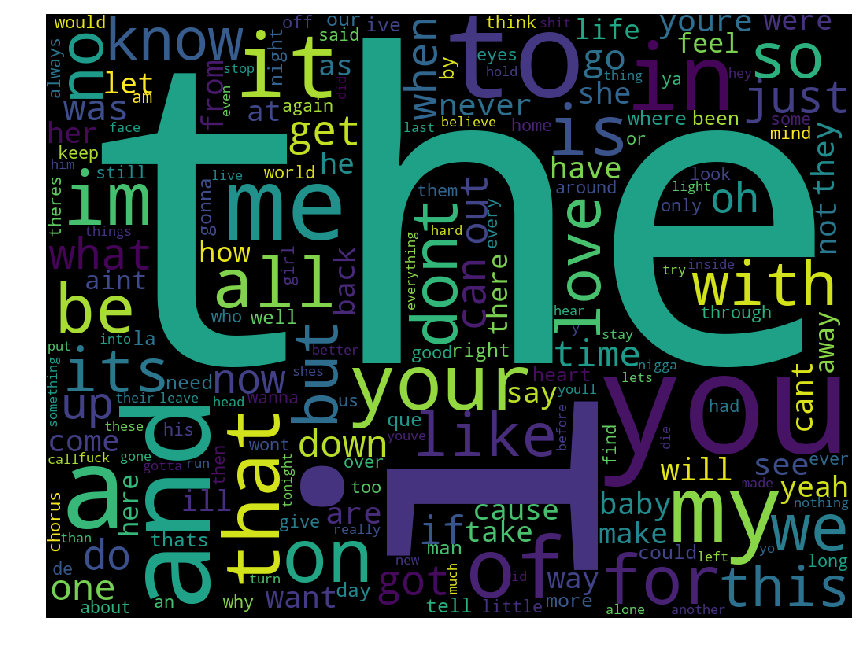

In [9]:
# Group the results by the word
word_groups_df = words_occurences_df.groupby("word")
# Calculate the sum for each group (a single group is just 
# a collection of all the rows with the same word)
word_occurences_global_series = word_groups_df.sum()["occurences"]

def display_word_cloud(series):
    """Displays a word cloud representation of given Series"""
    from wordcloud import WordCloud
    import matplotlib.pyplot as plt
    cloud = WordCloud(width=1024, height=768)
    cloud.generate_from_frequencies(series.to_dict())
    plt.imshow(cloud)
    plt.axis("off")
    plt.show()
    
# Display the word cloud for collected occurences
display_word_cloud(word_occurences_global_series)

In [10]:
# Display top 25 words among all the songs
word_occurences_global_series.sort_values(ascending=False).head(n=25)

word
the     2212869
i       1861252
you     1835518
to      1273027
and     1254585
a       1142398
me       913083
my       775231
in       740823
it       695751
of       611536
your     533118
that     516807
on       505271
im       496338
is       419249
all      418722
for      397097
be       388349
we       374315
so       346234
dont     344509
no       331105
its      321031
with     320389
Name: occurences, dtype: int64

As we may see, the most common 25 words are often meaningless and probably are just the most common words for the whole language. In NLP problems, we call such words "stopwords" and they are usually removed from the texts we work on. Let do the same in our example. There are some existing datasets that defines these stopwords. For example, nltk library, delivers them as a simple list and we are going to take it.

In [11]:
stopwords = ('i', 'im', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre',
             'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 
             'she', 'her', 'hers', 'herself', 'it', 'its', 'itself', 'they', 'them', 
             'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 
             'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 
             'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 
             'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 
             'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 
             'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 
             'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 
             'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how',
             'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'aint',
             'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 
             'very', 's', 't', 'can', 'will', 'just', 'don', 'dont', 'should', 'now', '')

def remove_stopwords(series):
    """Remove all the stopwords"""
    for stopword in stopwords:
        if stopword not in series:
            continue
        del series[stopword]
    return series
    
# Remove the stopwords from the calculated series
word_occurences_global_series = remove_stopwords(word_occurences_global_series)
# Display top 25 words among all the songs again
word_occurences_global_series.sort_values(ascending=False).head(n=25)

word
love     319369
like     313139
know     311761
got      224665
oh       220713
get      219875
go       185572
one      184688
time     183402
see      181325
never    175387
cant     158117
want     157800
come     148544
baby     147351
cause    141001
way      140812
yeah     139623
say      137779
let      135866
back     135065
make     133929
ill      133019
take     129448
life     116122
Name: occurences, dtype: int64

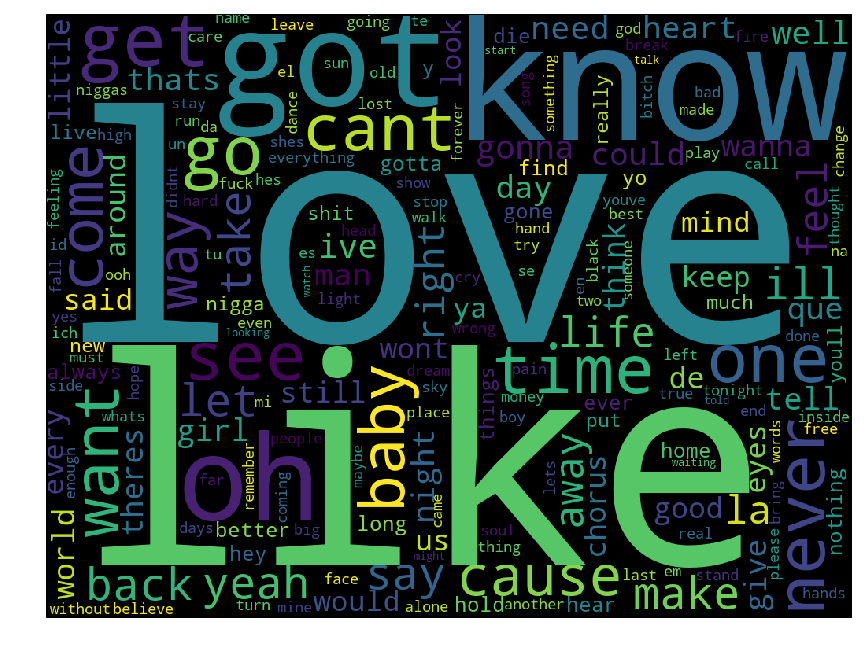

In [12]:
# Display the word cloud after removal
display_word_cloud(word_occurences_global_series)

Our word cloud looks much better now. We have an overall impression about what our songs are about.

### Example 03. Most common words within each genre
Our intitial task was to check what the most common words for all the songs are. It is particularly interesting if there are any differences between genres, so as a next step we will try to perform such process for all the genres we have. As our data structure is capable of doing such statistics easily, it won't take much time.

Genre: Pop


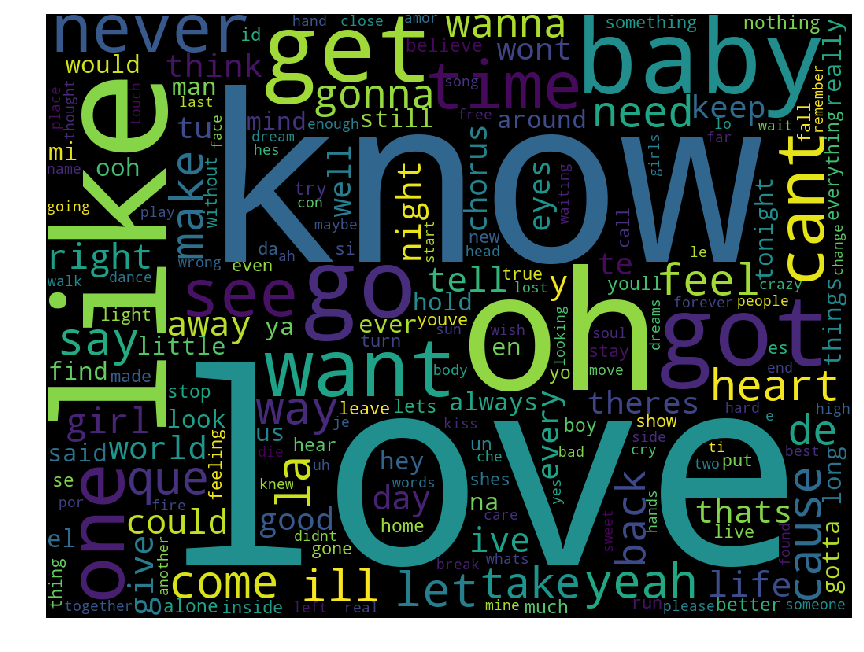

Genre: Hip-Hop


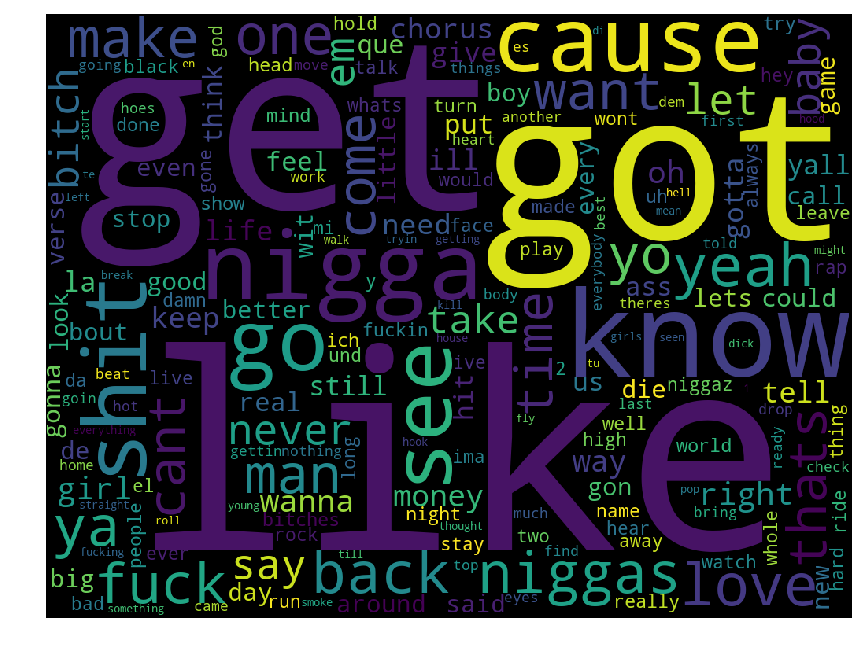

Genre: Not Available


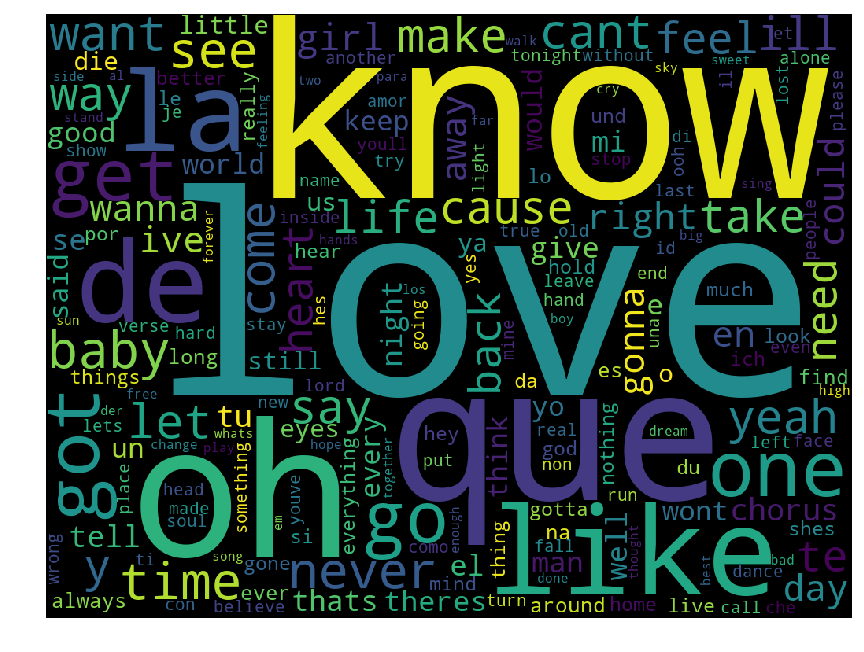

Genre: Rock


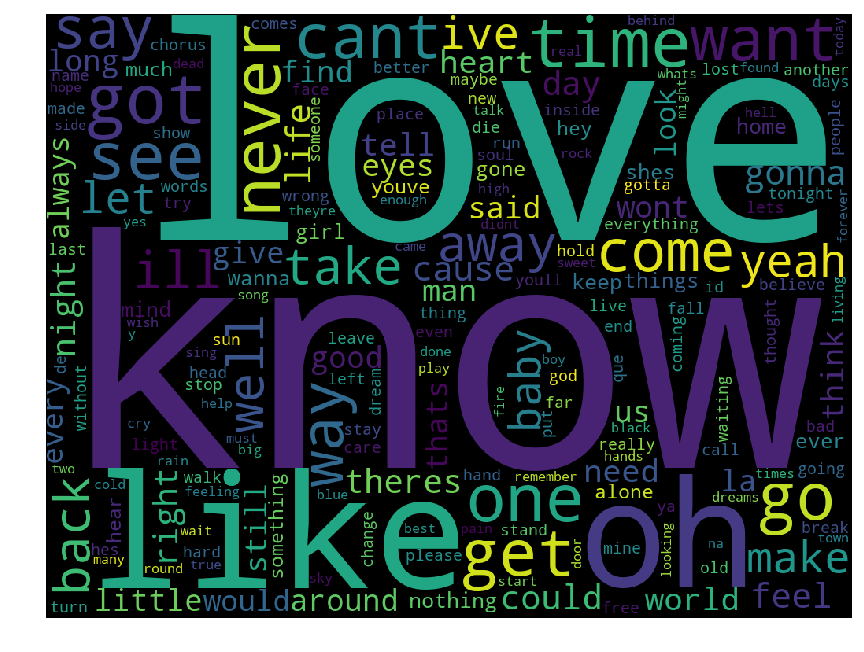

Genre: Metal


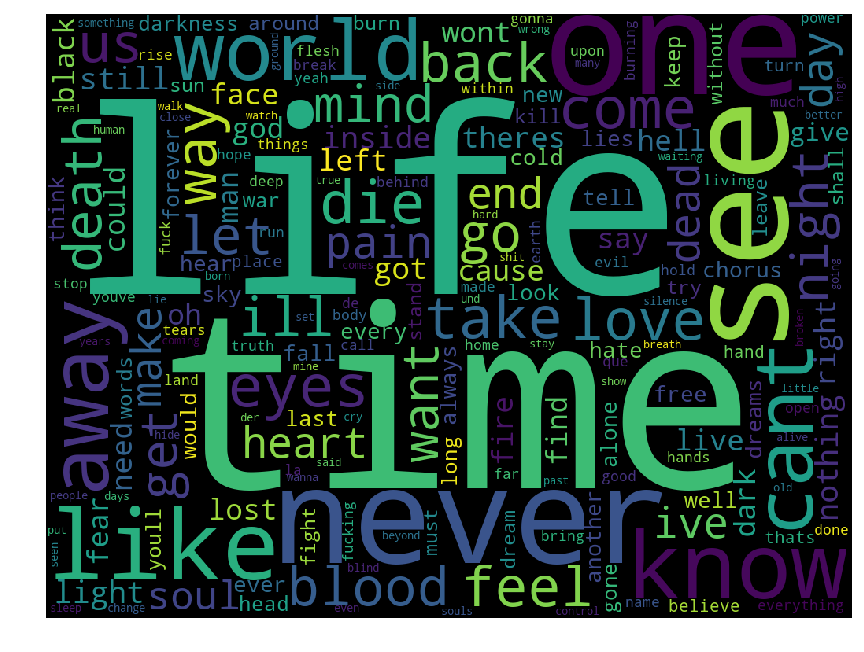

Genre: Other


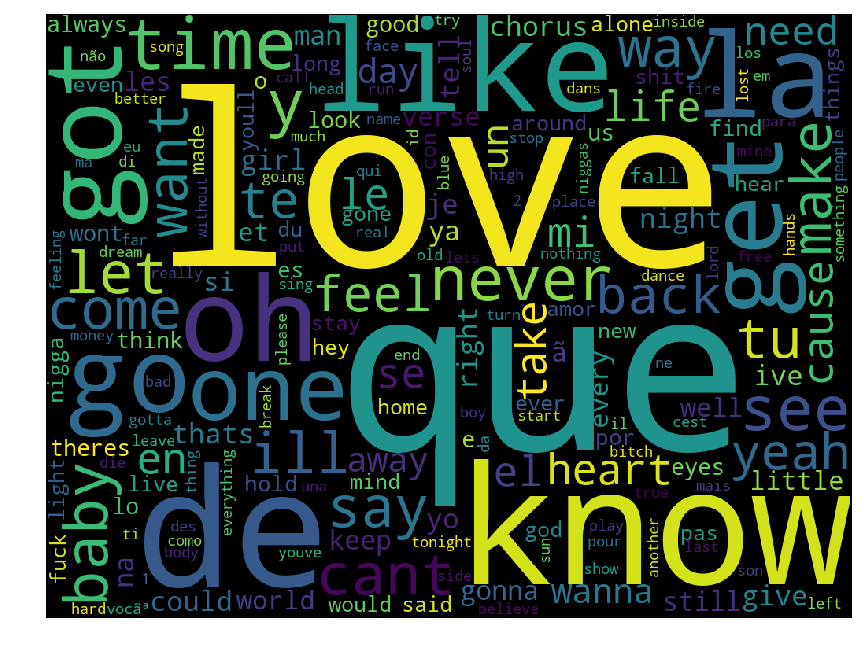

Genre: Country


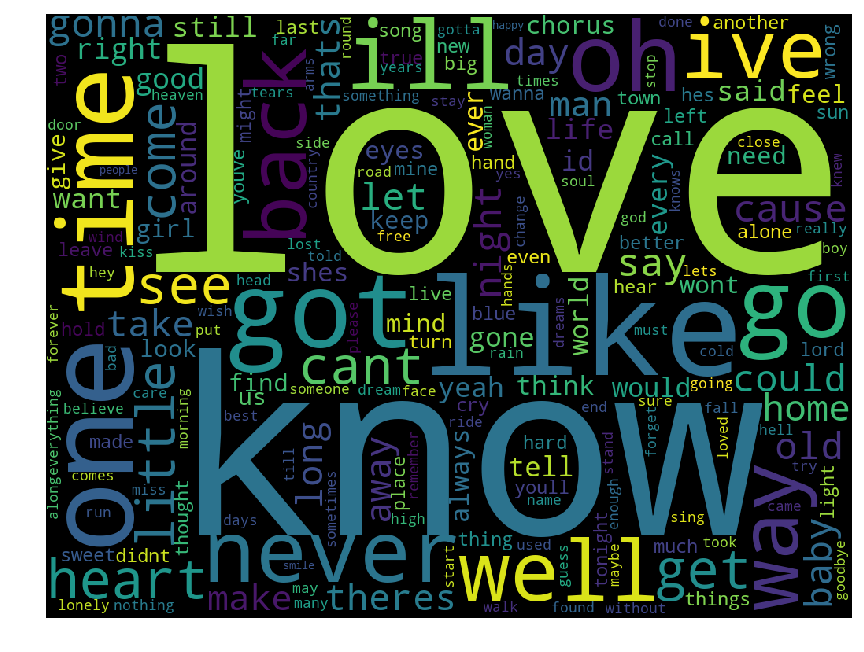

Genre: Jazz


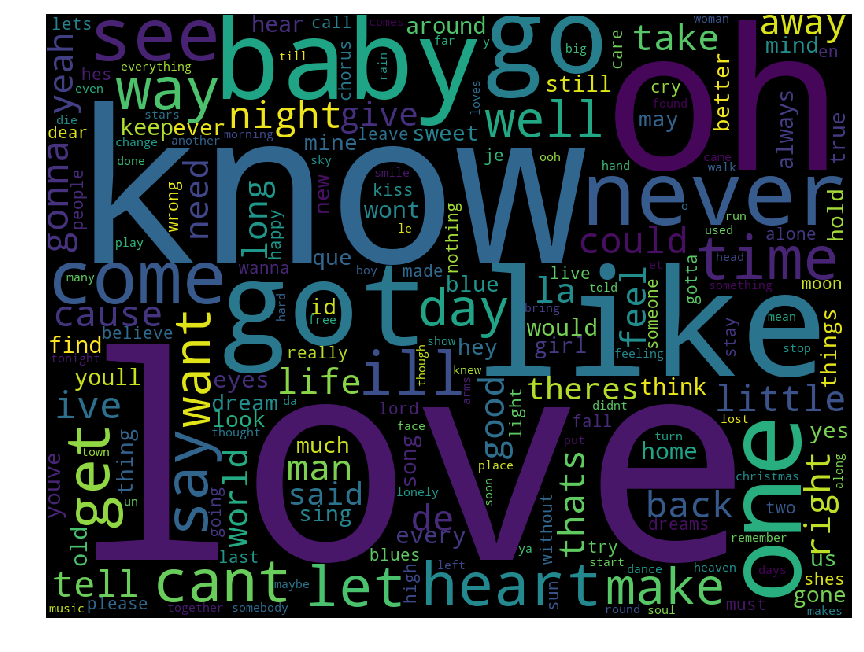

Genre: Electronic


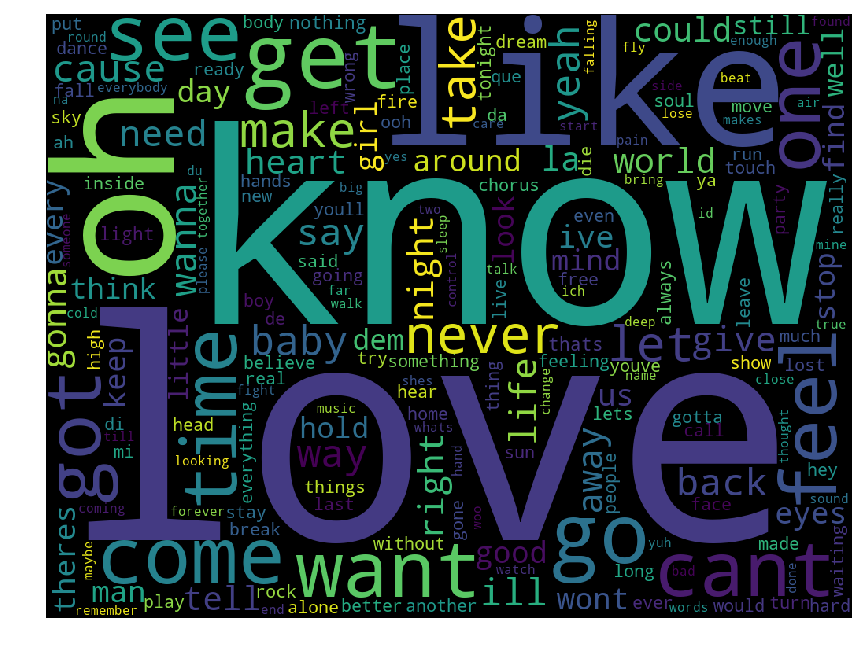

Genre: Folk


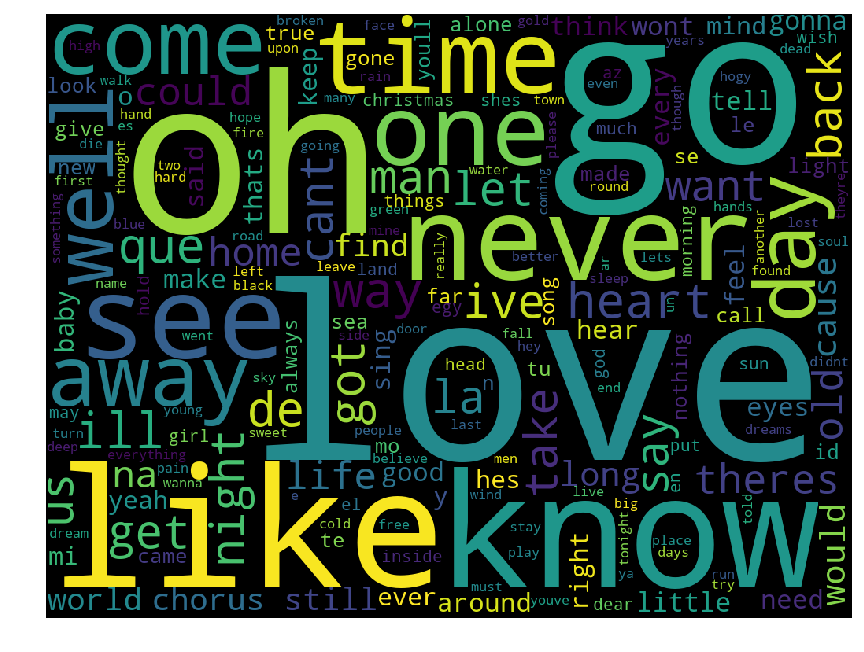

Genre: R&B


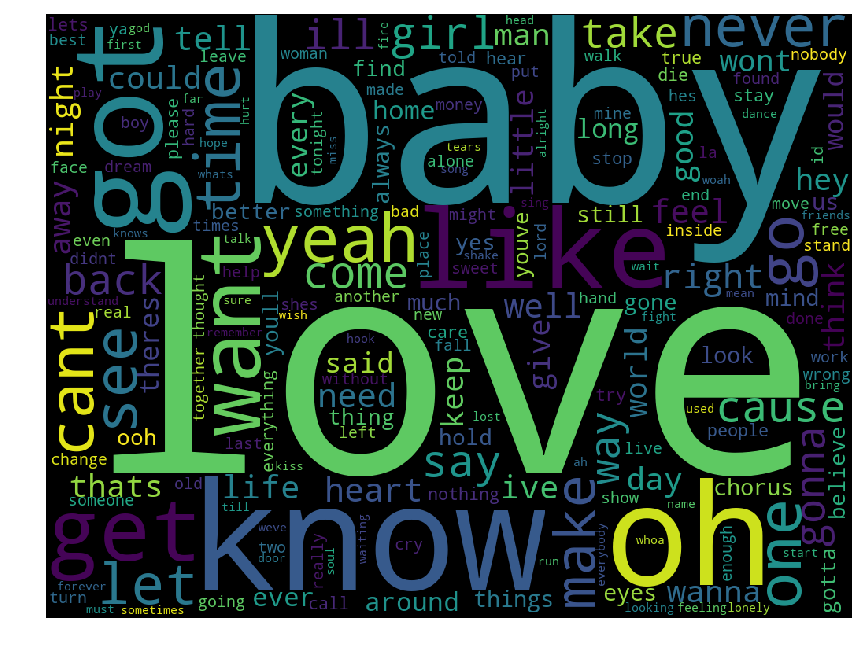

Genre: Indie


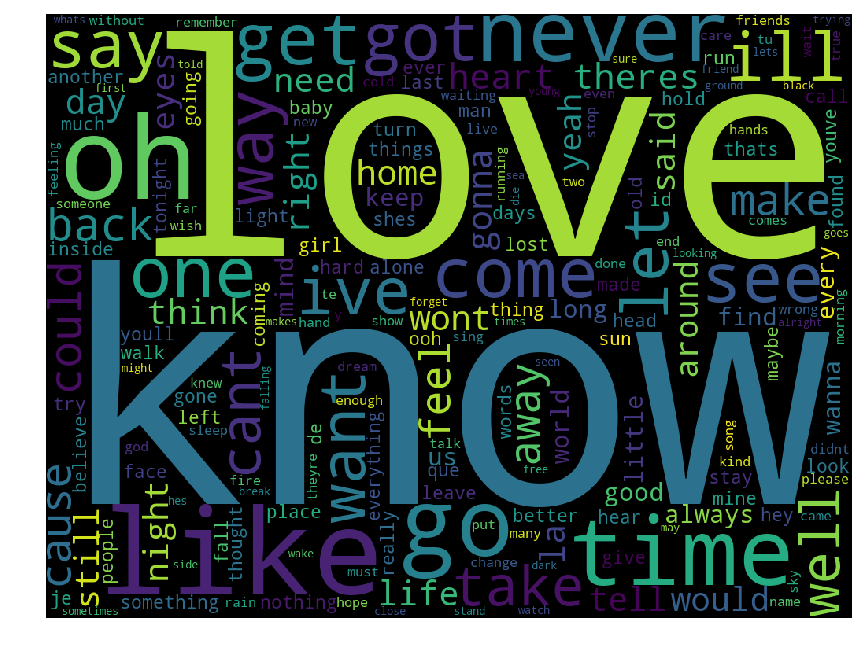

In [13]:
def get_genres_word_occurences(*genres):
    """Filters the word occurences for all the songs belonging to
    given genres. Additionally it removes the stopwords."""
    # Get the indexes of the songs which belong to the genre
    genre_index_series = lyrics_df[lyrics_df["genre"].isin(genres)]["song_index"]
    # Merge words with the songs of this
    genre_occurences_df = words_occurences_df[
        words_occurences_df["song_index"].isin(genre_index_series)]
    # Group the results by the word
    word_groups_df = genre_occurences_df.groupby("word")
    # Calculate the sum for each group
    genre_occurences_series = word_groups_df.sum()["occurences"]
    # Remove the stopwords from the calculated series
    genre_occurences_series = remove_stopwords(genre_occurences_series)
    return genre_occurences_series

# Get a list of genres we had in the dataset
unique_genres = lyrics_df["genre"].unique()
# For each genre show its name and word cloud
for genre in unique_genres:
    # Filter word occurences for given genre
    genre_occurences_series = get_genres_word_occurences(genre)
    # Display the genre with word cloud
    print("Genre:", genre)
    display_word_cloud(genre_occurences_series)

### Different ways of visualizing the data
Our word clouds, created for different genres, give us an overview of the differences among them. However, most of the words are still common for all of them. We need to find a way to go somehow deeper into the data we have. 

It is thought, [the first most popular 1000 words are used in 89% of everyday writing](https://www.quora.com/How-many-words-are-in-the-average-English-speakers-working-vocabulary). We are not sure if that is also right for lyrics, however let assume it may be. We are going to get a thousand of most popular words for each genre separately and try to find the ones which are genre specific across all.

Genre: Pop


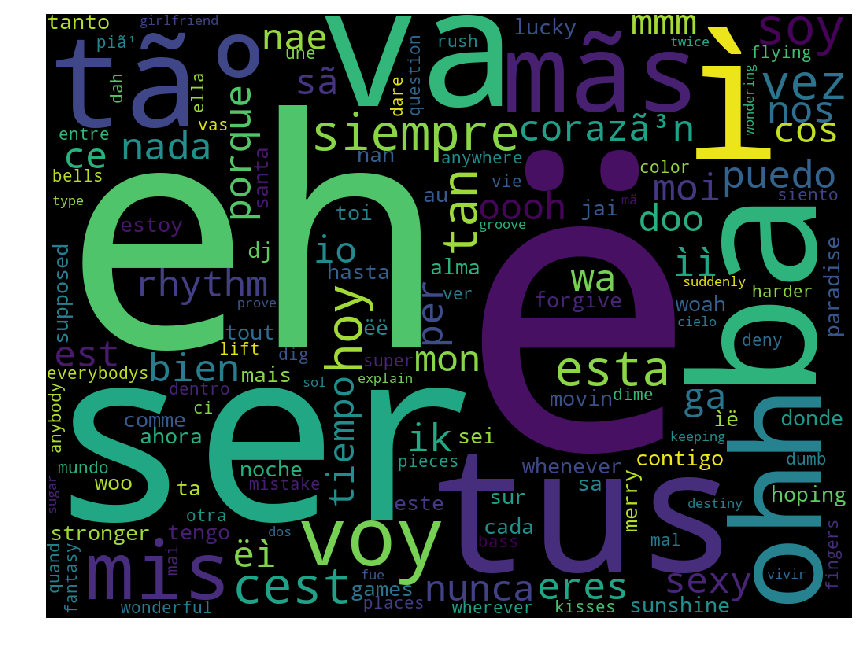

Genre: Hip-Hop


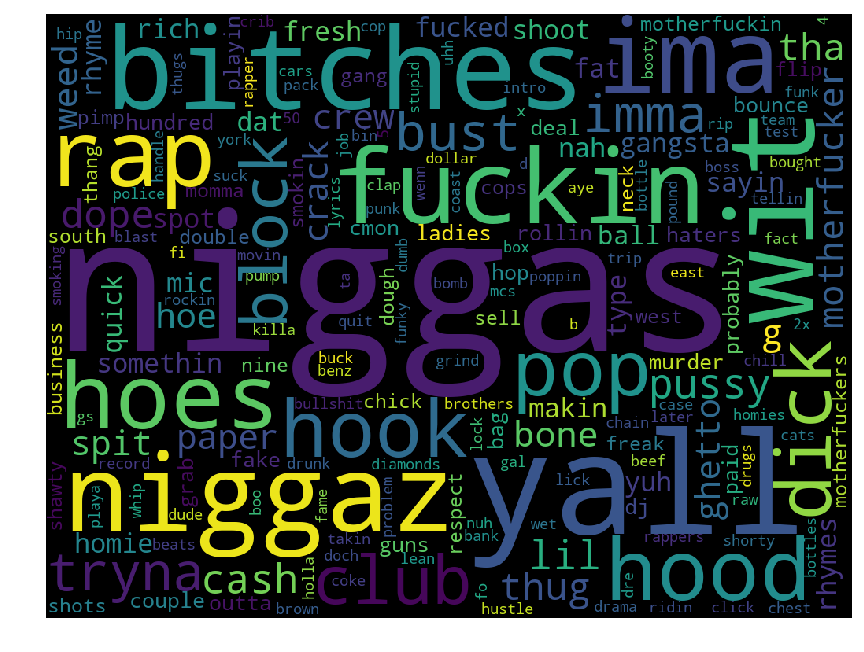

Genre: Not Available


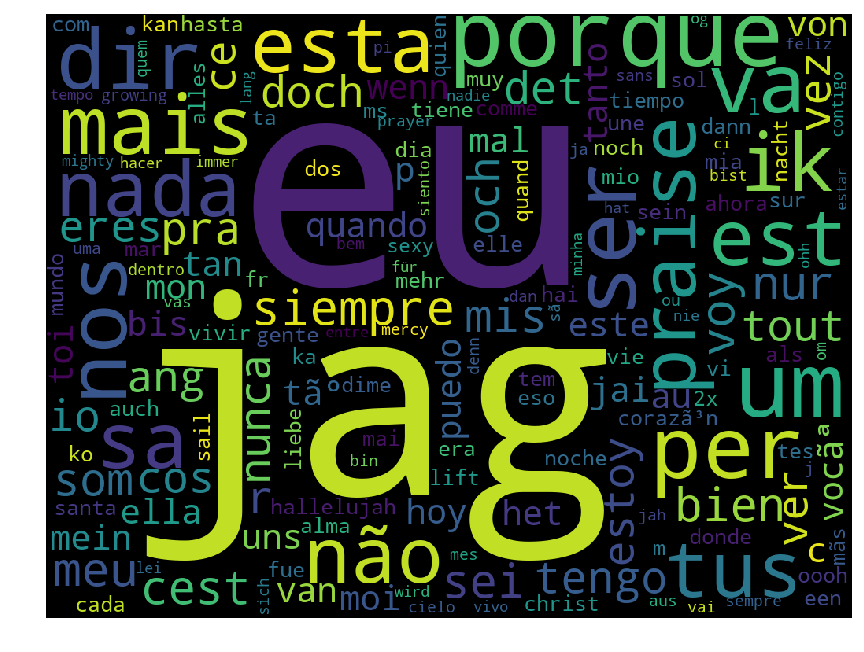

Genre: Rock


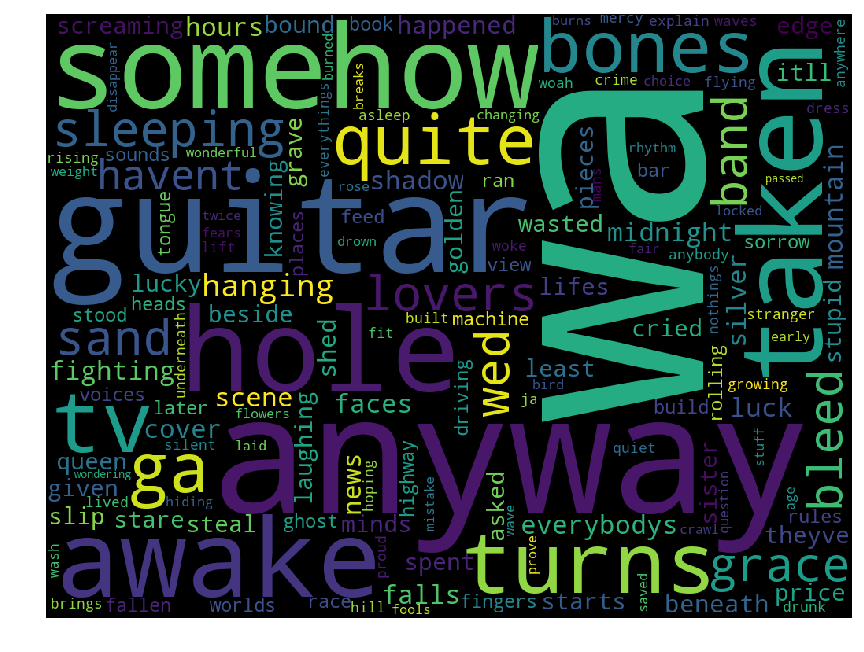

Genre: Metal


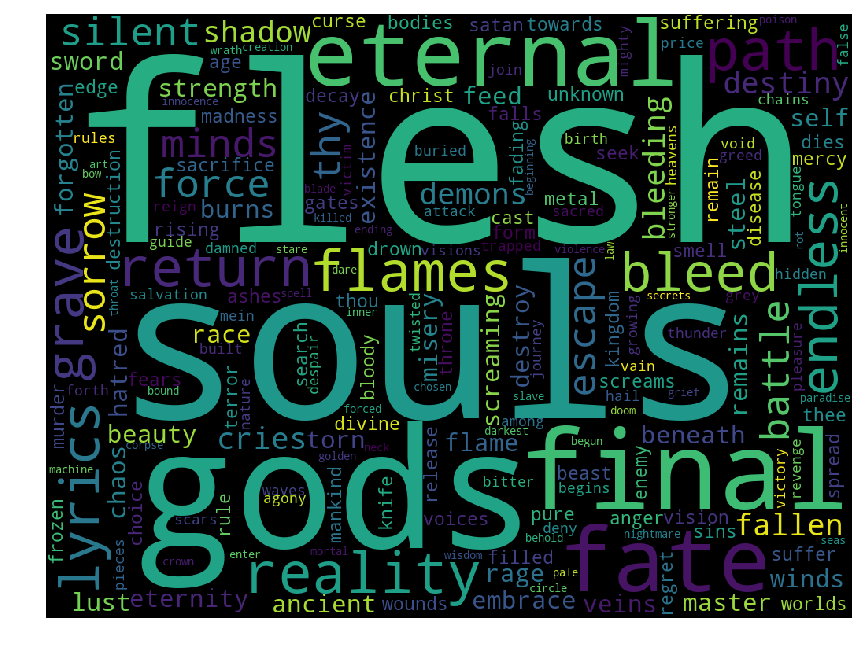

Genre: Other


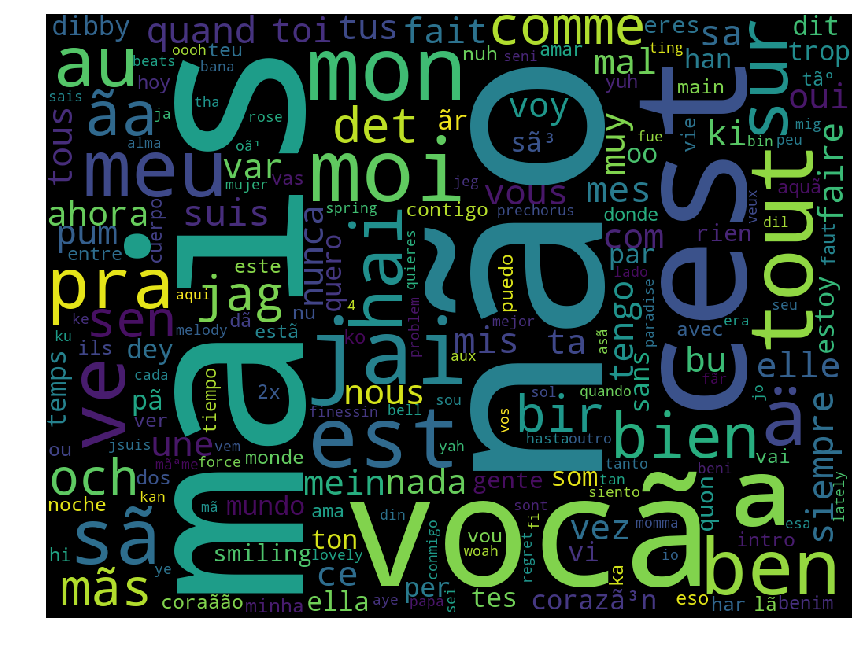

Genre: Country


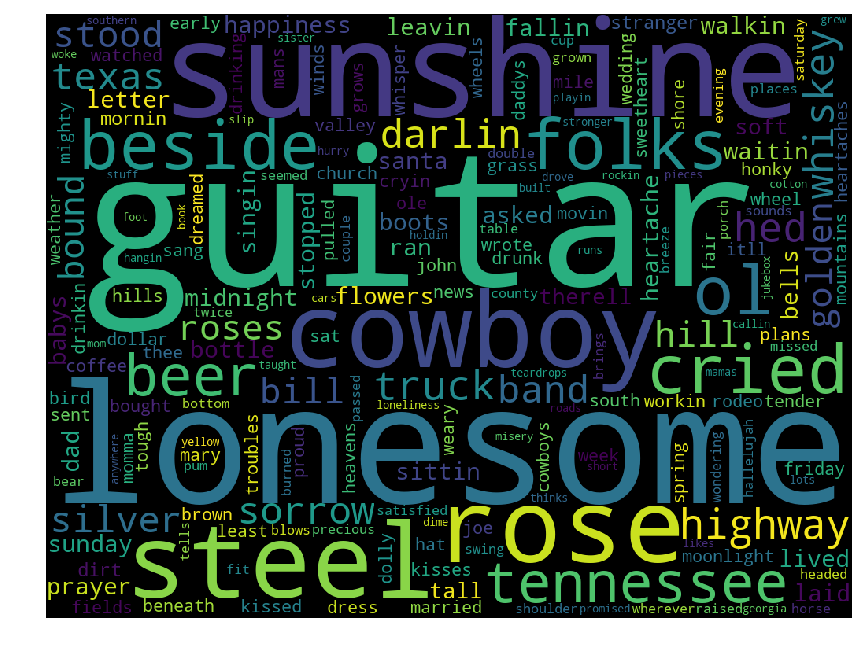

Genre: Jazz


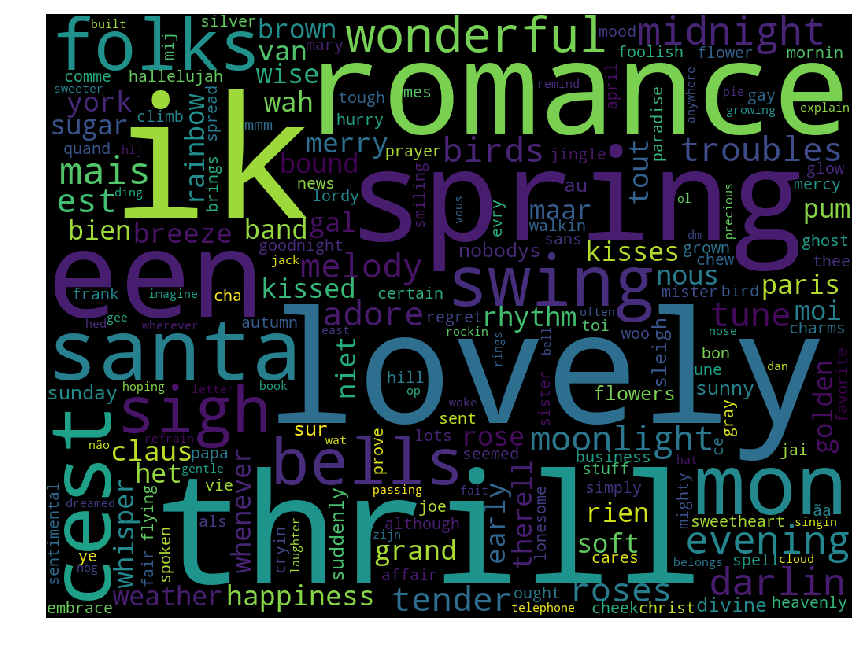

Genre: Electronic


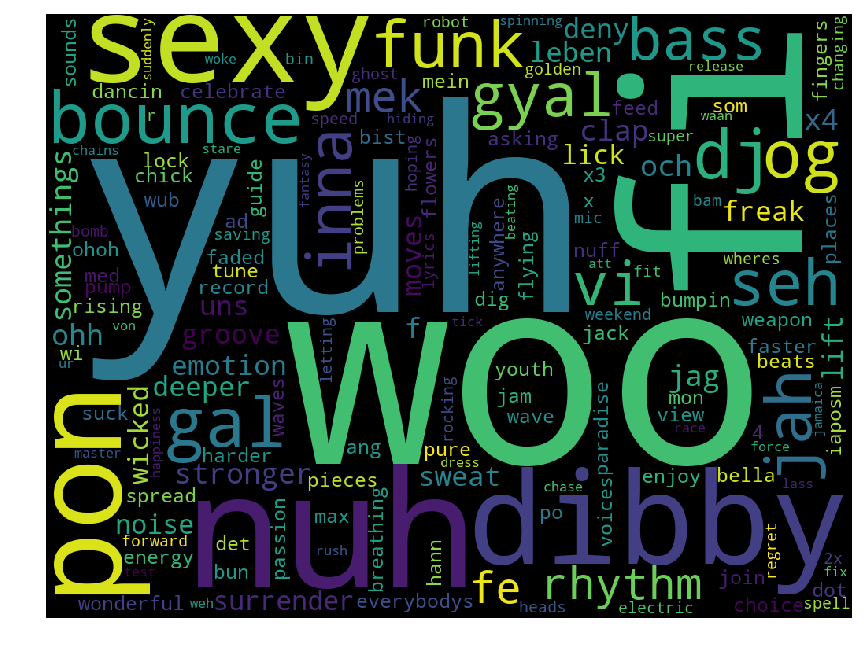

Genre: Folk


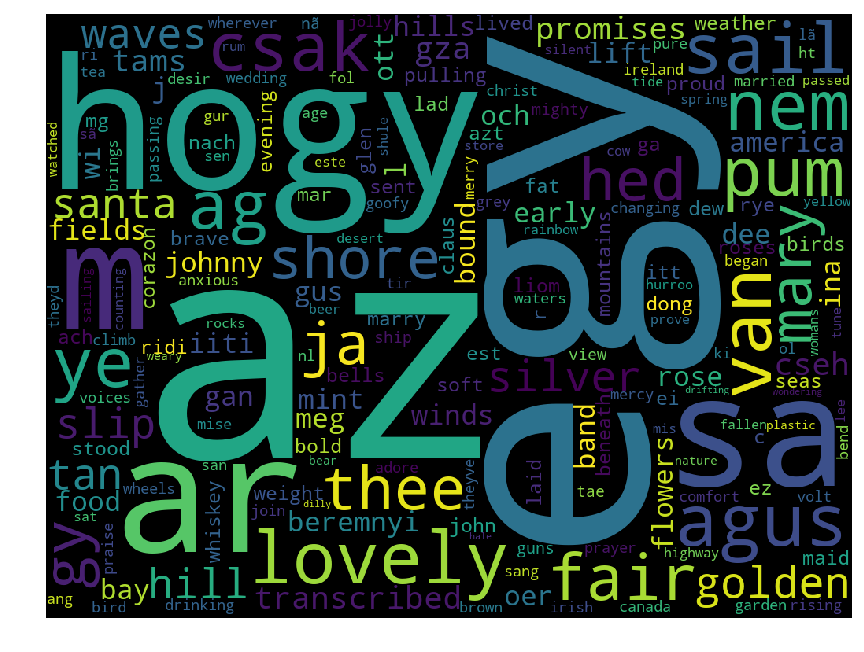

Genre: R&B


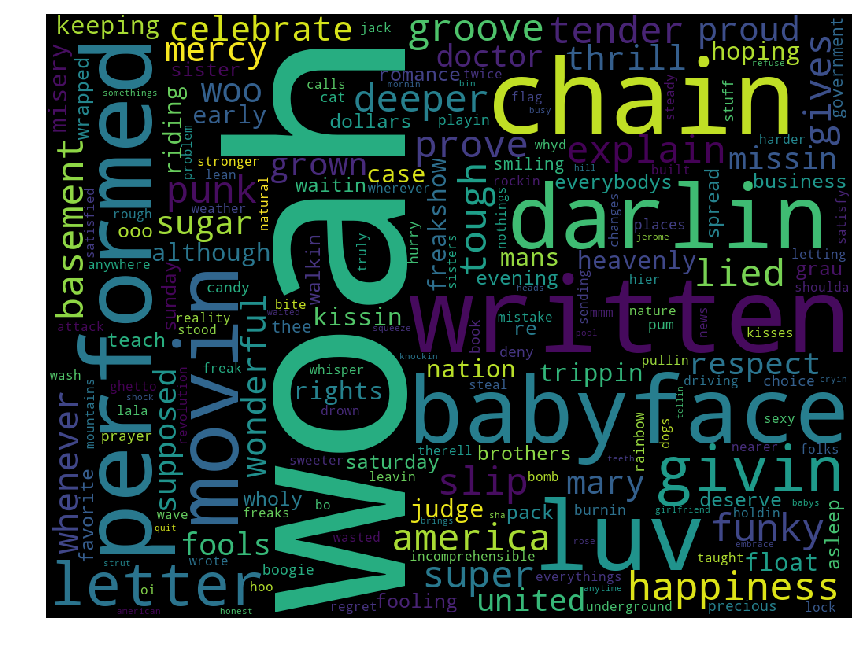

Genre: Indie


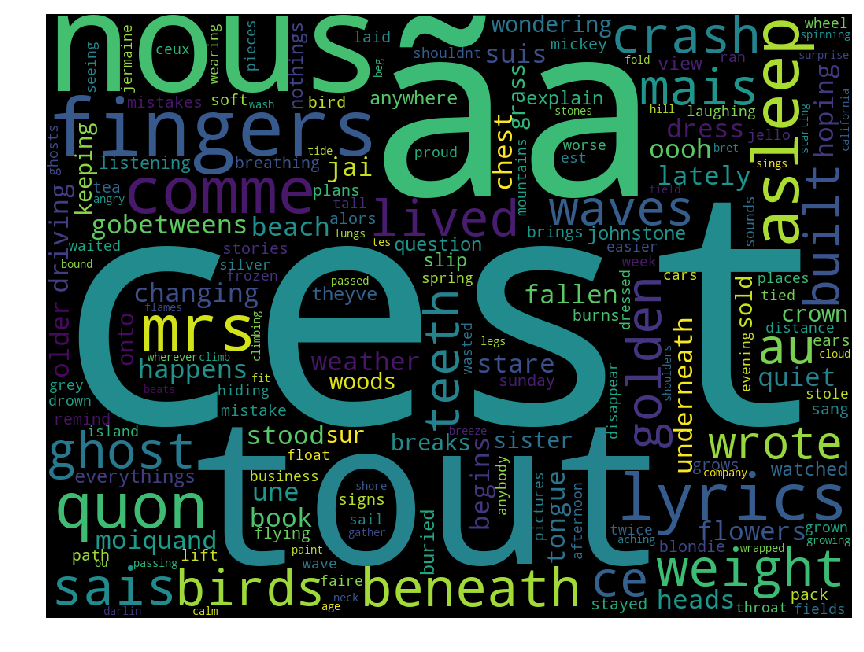

In [14]:
for genre in unique_genres:
    # Filter word occurences for given genre and get most 1000 common ones
    genre_occurences_series = get_genres_word_occurences(genre).sort_values(
        ascending=False)[0:1000]
    # Get the most 1000 common word occurences for all the rest of genres
    other_genres = (other for other in unique_genres if other != genre)
    non_genre_occurences_series = get_genres_word_occurences(*other_genres).sort_values(
        ascending=False)[0:1000]
    # Get other genres specific words
    non_genre_words = non_genre_occurences_series.keys()
    # Remove the common words to leave the one specific for selected genre
    genre_specific_occurences_series = genre_occurences_series.drop(non_genre_words, 
                                                                    errors="ignore")
    # Display the genre with word cloud
    print("Genre:", genre)
    display_word_cloud(genre_specific_occurences_series)

In [ ]:
# Remove the stopwords from the whole dataset
stopwords_index_series = words_occurences_df[words_occurences_df["word"].isin(stopwords)]
print(stopwords_index_series.index)
words_df = words_occurences_df.drop(stopwords_index_series)
words_df.head(10)

# Store the dataset for the rest of notebooks
%store words_df

In [ ]:
print(len(stopwords_index_series.index.get_values()))